# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Aulaa Mustika]
- **Email:** [aulaamustika0364@student.uns.ac.id]
- **ID Dicoding:** [MC312D5X2481]

## Menentukan Pertanyaan Bisnis


- Kategori produk mana yang menghasilkan pendapatan tertinggi?
- Kategori produk mana yang menghasilkan pendapatan terendah?
- Bagaimana pola jumlah pesanan tiap bulan?
- Status pesanan mana yang paling dominan?
- Wilayah mana yang memiliki jumlah pembatalan pesanan yang paling banyak dan paling sedikit?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from babel.numbers import format_currency

## Data Wrangling

### Gathering Data

In [ ]:
#Load Tabel orders
orders_df = pd.read_csv("Data/orders_dataset.csv",delimiter=",")
orders_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
#Load Tabel order_items
order_items_df = pd.read_csv("Data/order_items_dataset.csv",delimiter=",")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
#Load Tabel customers
customers_df = pd.read_csv("Data/customers_dataset.csv",delimiter=",")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
#Load Tabel products
products_df = pd.read_csv("Data/products_dataset.csv",delimiter=",")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
#Load Tabel product_category_translation
product_category_translation_df = pd.read_csv("Data/product_category_name_translation.csv",delimiter=",")
product_category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**

Terdapat 4 Tabel yang digunakan, yaitu:
- **Tabel orders** : berisi informasi mengenai pesanan dengan pelanggan, seperti order_id,	customer_id,order_status,	order_purchase_timestamp,	order_approved_at,	order_delivered_carrier_date,	order_delivered_customer_date, dan	order_estimated_delivery_date
- **Tabel order_items** : berisi detail barang yang dibeli dalam setiap pesanan, seperti order_id,	order_item_id,	product_id,	seller_id,	shipping_limit_date, dan	price	freight_value
- **Tabel customers** : berisi data pelanggan, seperti customer_id,	customer_unique_id,	customer_zip_code_prefix,	customer_city,	dan customer_state
- **Tabel products** : berisi data produk, seperti product_id,	product_category_name,	product_name_lenght,	product_description_lenght,	product_photos_qty,	product_weight_g,	product_length_cm,	product_height_cm,	dan product_width_cm
- **Tabel product_category_translation** : terjemahan kategori produk, seperti product_category_name dan	product_category_name_english



### Assessing Data

In [ ]:
#Menilai Data orders_df
orders_df.info()

orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
#Memastikan missing value
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [ ]:
orders_df.loc[orders_df["order_status"] == "canceled",
              ["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"]].isna().all()

,0
order_approved_at,False
order_delivered_carrier_date,False
order_delivered_customer_date,False


In [ ]:
#mengecek Duplikasi
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
#Menilai Data order_items_df
order_items_df.info()

order_items_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [ ]:
#Menilai Data customers_df
customers_df.info()

customers_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [ ]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
#Menilai Data products_df

products_df.info()

#Mengecek missing value
products_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
#Mengecek jumlah kategori unik
products_df.nunique()

,0
product_id,32951
product_category_name,73
product_name_lenght,66
product_description_lenght,2960
product_photos_qty,19
product_weight_g,2204
product_length_cm,99
product_height_cm,102
product_width_cm,95


In [ ]:
#Mengecek duplikasi data
print("Jumlah duplikasi: ", products_df.duplicated().sum())

products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
#Menilai Data product_category_translation_df
product_category_translation_df.info()

#Mengecek missing value
product_category_translation_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


,0
product_category_name,0
product_category_name_english,0


In [ ]:
#Mengecek jumlah kategori unik
product_category_translation_df.nunique()

,0
product_category_name,71
product_category_name_english,71


In [ ]:
print("Jumlah duplikasi: ", product_category_translation_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**


📌 Data `orders_df`
- ⚠ Kesalahan tipe data untuk kolom berikut (seharusnya `datetime`, bukan `object`):
  - `order_purchase_timestamp`
  - `order_approved_at`
  - `order_delivered_carrier_date`
  - `order_delivered_customer_date`
  - `order_estimated_delivery_date`
- kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date` terdapat missing value, namun tidak perlu diatasi. Hal itu karena setelah dilihat ternyata tiga kolom tersebut tidak memiliki nilai saat `order_status` nya canceled (dibatalkan). Sehingga make sense jika tidak ada nilainya. Kemudian setelah dipastikan lagi, ternyata ketiga kolom mengembalikan nilai False yang berarti ada status order Canceled pada tiga kolom tersebut yang memiliki tanggal. Jadi, mungkin saja bahwa pesanan dibatalkan saat sudah payment atau kondisi lainnya.

📌 Data `order_items_df`
- ⚠ Kesalahan tipe data untuk kolom `shipping_limit_date` (seharusnya `datetime`, bukan `object`)

📌 Data `products_df`
- 🔴 inaccurate value  pada nilai minimum kolom `product_weight_g` karena tidak mungkin beratnya 0 gram terutama itu adalah produk dengan kategori bed bath table
- ❌ 610 missing value pada kolom:
  - `product_category_name`
  - `product_name_lenght`
  - `product_description_lenght`
  - `product_photos_qty`
- ❌ 2 missing value pada kolom:
  - `product_weight_g`
  - `product_length_cm`
  - `product_height_cm`
  - `product_width_cm`
- Karena kategori produknya sendiri sangat beragam jenis, sehingga jika terdapat berat, panjang, maupun tinggi produk yang kontras dengan yang lain itu mungkin saja.

📌 Data `product__category_translation_df`
- Karena pada EDA nanti data `products_df` dan `product__category_translation_df` akan di gabungkan, maka jumlah kategori unik nya harus sama. Tetapi berdasarkan Assessing Data di atas, jumlah kategori unik pada kolom `product_category_name` di data `products_df` dan `product__category_translation_df` berbeda.
  - jumlah kategori unik kolom `product_category_name` di data `products_df` yaitu 73.
  - jumlah kategori unik kolom `product_category_name` di data `product__category_translation_df` yaitu 71.


### Cleaning Data

In [ ]:
#Membersihkan Data orders_df

#Mengatasi Kesalahan Tipe Data
datetime_columns = ["order_purchase_timestamp", "order_approved_at",
    "order_delivered_carrier_date", "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [ ]:
#Membersihkan Data order_items_df

#Mengatasi Kesalahan Tipe Data
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
#Membersihkan Data products_df

#Mengatasi Inaccurate Value
products_df[products_df['product_weight_g'] == 0]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


In [ ]:
#Imputation dengan nilai median
median_weight = products_df.loc[products_df['product_weight_g'] > 0, 'product_weight_g'].median()
products_df.loc[products_df['product_weight_g'] == 0, 'product_weight_g'] = median_weight

products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.557468,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.000497,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
#Mengatasi Missing Value
#Data Kategorik
kategori_dominan = products_df["product_category_name"].mode()[0]
products_df["product_category_name"] = products_df["product_category_name"].fillna(kategori_dominan)

#Data Numerik
numerical_cols = [
    "product_name_lenght", "product_description_lenght", "product_photos_qty",
    "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"
]
for col in numerical_cols:
    median_value = products_df[col].median()
    products_df[col] = products_df[col].fillna(median_value)

products_df.isnull().sum()
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
#Membersihkan data pada product_category_translation_df

# Mencari kategori unik di products_df dan product_category_translation_df
unique_products_categories = set(products_df["product_category_name"].unique())
unique_translation_categories = set(product_category_translation_df["product_category_name"].unique())

# Mencari kategori yang ada di products_df tetapi tidak ada di product_category_translation_df
missing_categories = unique_products_categories - unique_translation_categories

print("Kategori yang hilang di product_category_translation_df:", missing_categories)

Kategori yang hilang di product_category_translation_df: {'portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'}


In [ ]:
# Membuat DataFrame kategori yang hilang
new_categories_df = pd.DataFrame({
    "product_category_name": list(missing_categories),
    "product_category_name_english": ["portable_kitchen_and_food_processors", "gaming_pc"]
})

# Menggabungkan dengan tabel product_category_translation_df
product_category_translation_df = pd.concat([product_category_translation_df, new_categories_df], ignore_index=True)

product_category_translation_df.tail()

,product_category_name,product_category_name_english
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services
71,portateis_cozinha_e_preparadores_de_alimentos,portable_kitchen_and_food_processors
72,pc_gamer,gaming_pc


In [ ]:
print("Jumlah kategori unik di products_df:", products_df["product_category_name"].nunique())
print("Jumlah kategori unik di product_category_translation_df:", product_category_translation_df["product_category_name"].nunique())

Jumlah kategori unik di products_df: 73
Jumlah kategori unik di product_category_translation_df: 73


**Insight:**

📌 Data `orders_df`
- ⚠  Kesalahan tipe data = tipe sudah sesuai menjadi datetime.

📌 Data `order_items_df`
- ⚠ Kesalahan tipe data = tipe sudah sesuai menjadi datetime

📌 Data `products_df`
- 🔴 Inaccurate value = terdapat 4 produk yang sama yaitu cama mesa banho (bed bath table) dan memiliki berat 0 gram. Karena numerik, maka diatasi dengan imputasi dengan nilai median.
- ❌ Missing value = data kategorik diatasi dengan imputasi menggunakan kategori yang paling dominan dan untuk data numerik diatasi dengan imputasi menggunakan nilai median yang lebih tahan terhadap pencilan.

📌 Data `product__category_translation_df`
- Ada 2 kategori unik di kolom `product_category_name` data `product__category_translation_df` yang menghilang, yaitu portateis_cozinha_e_preparadores_de_alimentos dan pc_gamer. Diatasi dengan membuat dataframe baru dan menggabungkannya ke data `product__category_translation_df`.


## Exploratory Data Analysis (EDA)

### Explore

In [ ]:
#Menggabungkan Data products_df dan product_category_translation_df
products_df = pd.merge(
    left=products_df,
    right=product_category_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [ ]:
#Menggabungkan Data orders_df, order_items_df, dan customers_df
orders_items_customers_df = orders_df.merge(order_items_df, on="order_id").merge(customers_df, on="customer_id")
orders_items_customers_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [ ]:
#Menggabungkan Data orders_items_customers_df dengan products_df
orders_items_customers_products_df = orders_items_customers_df.merge(products_df, on="product_id")
orders_items_customers_products_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,BA,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,GO,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,RN,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,SP,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,SP,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,...,BA,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,RJ,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,RJ,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories


In [ ]:
#Total revenue (pendapatan) per kategori produk
product_revenue_df = orders_items_customers_products_df.groupby("product_category_name_english").agg(
    total_revenue = ("price", "sum")
).reset_index()

product_revenue_df

,product_category_name_english,total_revenue
0,agro_industry_and_commerce,72530.47
1,air_conditioning,55024.96
2,art,24202.64
3,arts_and_craftmanship,1814.01
4,audio,50688.50
...,...,...
68,stationery,230943.23
69,tablets_printing_image,7528.41
70,telephony,323667.53
71,toys,483946.60


In [ ]:
#Rangkuman parameter statistik
product_revenue_df.describe()

,total_revenue
count,7.300000e+01
mean,1.861869e+05
std,3.087182e+05
min,2.832900e+02
25%,7.528410e+03
50%,4.632837e+04
75%,1.914989e+05
max,1.258681e+06


In [ ]:
#Menghitung jumlah pesanan per bulan
orders_items_customers_products_df["month_year"] = orders_items_customers_products_df["order_purchase_timestamp"].dt.to_period("M")
monthly_orders_df = orders_items_customers_products_df.groupby("month_year")["order_id"].count()

monthly_orders_df

,order_id
month_year,
2016-09,6
2016-10,363
2016-12,1
2017-01,955
2017-02,1951
2017-03,3000
2017-04,2684
2017-05,4136
2017-06,3583


In [ ]:
# Menghitung jumlah masing-masing status pesanan
status_counts_df = orders_items_customers_products_df['order_status'].value_counts()
status_counts_df

,count
order_status,
delivered,110197
shipped,1185
canceled,542
invoiced,359
processing,357
unavailable,7
approved,3


In [ ]:
# Distribusi status pesanan per wilayah
status_by_state_df = orders_items_customers_products_df.groupby(["customer_state", "order_status"]).size().unstack(fill_value=0)
status_by_state_df

order_status,approved,canceled,delivered,invoiced,processing,shipped,unavailable
customer_state,,,,,,,
AC,0,0,91,0,0,1,0
AL,0,0,427,2,6,9,0
AM,0,0,163,0,0,2,0
AP,0,0,81,0,1,0,0
BA,0,14,3683,9,16,77,0
CE,0,4,1426,1,6,41,0
DF,0,9,2355,3,8,31,0
ES,0,8,2225,4,2,17,0
GO,0,10,2277,5,7,34,0


**Insight:**

**Tabel `orders_items_customers_products_df`**
- Menggabungkan Tabel `products` dengan  `product_category_name_translation` agar kategori produk ada versi inggrisnya sehingga lebih mudah dimengerti dan dianalisis.
- Selanjutnya menggabungkan Tabel `orders`, `order_items`, `customers`, dan `products` yang akan menjadi tabel utama yaitu `orders_items_customers_products_df`.

**Tabel `product_revenue_df`**
- Tabel `product_revenue_df` merupakan total revenue setiap kategori produk untuk mengetahui produk mana yang memiliki pendapatan tertinggi dan terendah.
- Variansi total revenue (pendapatan) sangat tinggi antar kategori produk yang berarti tidak semua kategori memiliki performa penjualan sama baiknya.
- Terdapat kategori produk dengan pendapatan maksimum 1258681.34 BRL dan pendapatan terendah 283.29 BRL.

**Tabel `monthly_orders_df`**
- Tabel `monthly_orders_df` merupakan  jumlah pesanan tiap bulan untuk mengetahui bagaimana polanya.
- Jumlah pesanan tertinggi terdapat pada bulan November 2017 mencapai 8665 pesanan.
- Jumlah pesanan terendah terdapat pada bulan Desember 2016 dan September 2018, yaitu hanya 1 pesanan.

**Tabel`status_counts_df`**
- Tabel `status_counts_df` merupakan banyak pesanan dalam tiap kategori status untuk menghitung persentase masing-masing status pesanan.
- Terdapat 110197 pesanan yang berstatus delivered (pesanan telah diterima pelanggan).
- Terdapat 3 pesanan yang berstatus approved (pesanan telah disetujui).

**Tabel `status_by_state_df`**
- Tabel `status_by_state_df` merupakan jumlah tiap status pesanan yang ada berdasarkan wilayah.
- Kecuali status pesanan approve, wilayah SP memiliki jumlah pesanan yang berstatus canceled,	delivered,	invoiced,	processing,	shipped,	dan unavailable yang tertinggi dibandingkan wilayah lain.





## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk mana yang menghasilkan pendapatan tertinggi?



In [ ]:
#Kategori produk dengan pendapatan tertinggi
top_products_df = product_revenue_df.sort_values("total_revenue", ascending=False).head(10)
top_products_df

,product_category_name_english,total_revenue
44,health_beauty,1258681.34
7,bed_bath_table,1216523.96
72,watches_gifts,1205005.68
67,sports_leisure,988048.97
15,computers_accessories,911954.32
39,furniture_decor,729762.49
20,cool_stuff,635290.85
50,housewares,632248.66
5,auto,592720.11
43,garden_tools,485256.46


<ipython-input-236-06287bb3f5fc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


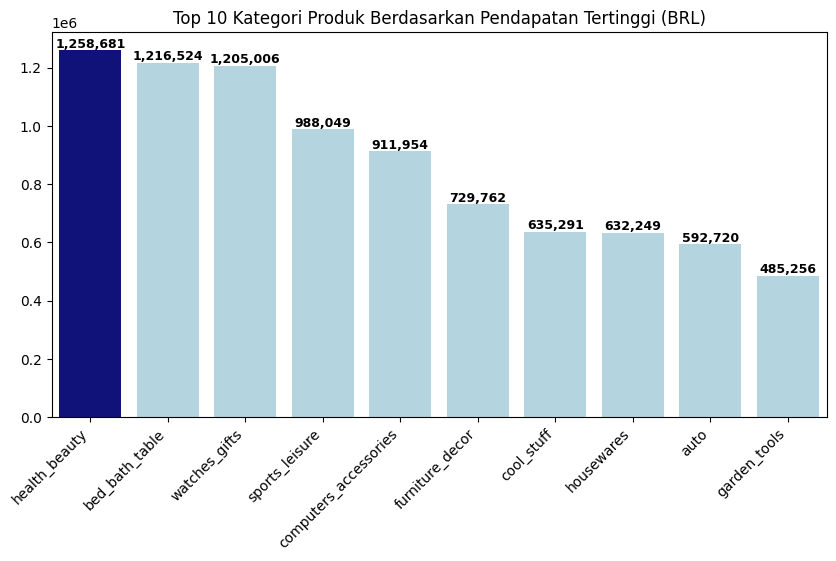

In [ ]:
#Visualisasi kategori produk dengan pendapatan tertinggi
top_products_df_reset = top_products_df.reset_index()

colors_top = ["lightblue"] * len(top_products_df_reset)
max_revenue_index = top_products_df_reset["total_revenue"].idxmax()
colors_top[max_revenue_index] = "darkblue"

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=top_products_df,
    x="product_category_name_english",
    y="total_revenue",
    palette=colors_top
    )

for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title(f"Top 10 Kategori Produk Berdasarkan Pendapatan Tertinggi (BRL)")

plt.xticks(rotation=45, ha="right")

plt.xlabel("")
plt.ylabel("")

plt.show()

### Pertanyaan 2: Kategori produk mana yang menghasilkan pendapatan terendah?


In [ ]:
#Kategori produk dengan pendapatan terendah
bottom_products_df = product_revenue_df.sort_values("total_revenue", ascending=True).head(10)
bottom_products_df

,product_category_name_english,total_revenue
63,security_and_services,283.29
29,fashion_childrens_clothes,569.85
11,cds_dvds_musicals,730.00
47,home_comfort_2,760.27
35,flowers,1110.04
42,gaming_pc,1545.95
23,diapers_and_hygiene,1567.59
3,arts_and_craftmanship,1814.01
53,la_cuisine,2054.99
32,fashion_sport,2119.51


<ipython-input-238-2a5b8114bbc6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


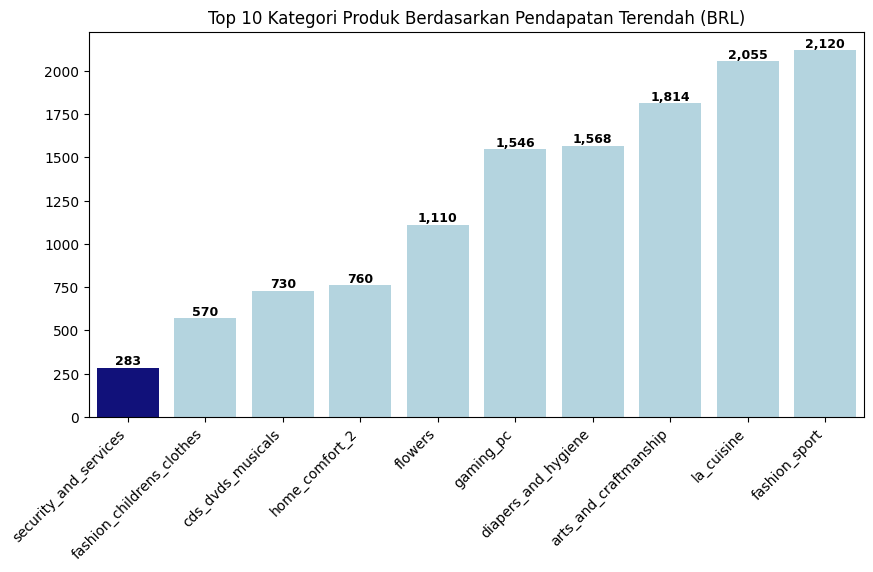

In [ ]:
#Visualisasi kategori produk dengan pendapatan terendah
bottom_products_df_reset = bottom_products_df.reset_index()

colors_bottom = ["lightblue"] * len(bottom_products_df_reset)
min_revenue_index = bottom_products_df_reset["total_revenue"].idxmin()
colors_bottom[min_revenue_index] = "darkblue"

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=bottom_products_df,
    x="product_category_name_english",
    y="total_revenue",
    palette=colors_bottom
    )

for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title(f"Top 10 Kategori Produk Berdasarkan Pendapatan Terendah (BRL)")

plt.xticks(rotation=45, ha="right")

plt.xlabel("")
plt.ylabel("")

plt.show()

### Pertanyaan 3: Bagaimana pola jumlah pesanan tiap bulan?


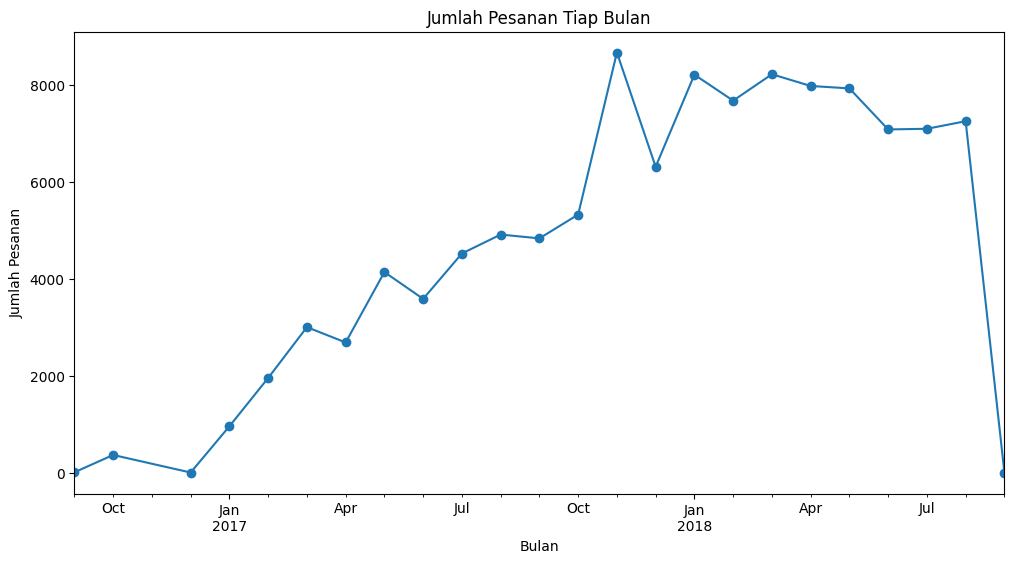

In [ ]:
# Visualisasi pola jumlah pesanan tiap bulan
plt.figure(figsize=(12,6))
monthly_orders_df.plot(marker="o")

plt.title("Jumlah Pesanan Tiap Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.xticks(rotation=0)
plt.show()

### Pertanyaan 4: Status pesanan mana yang paling dominan?


In [ ]:
# Menghitung persentase tiap status pesanan
status_percentage_df = (status_counts_df / status_counts_df.sum()) * 100
status_percentage_df = status_percentage_df.round(2).astype(str)
status_percentage_df

,count
order_status,
delivered,97.82
shipped,1.05
canceled,0.48
invoiced,0.32
processing,0.32
unavailable,0.01
approved,0.0


<ipython-input-241-dfae63e35451>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


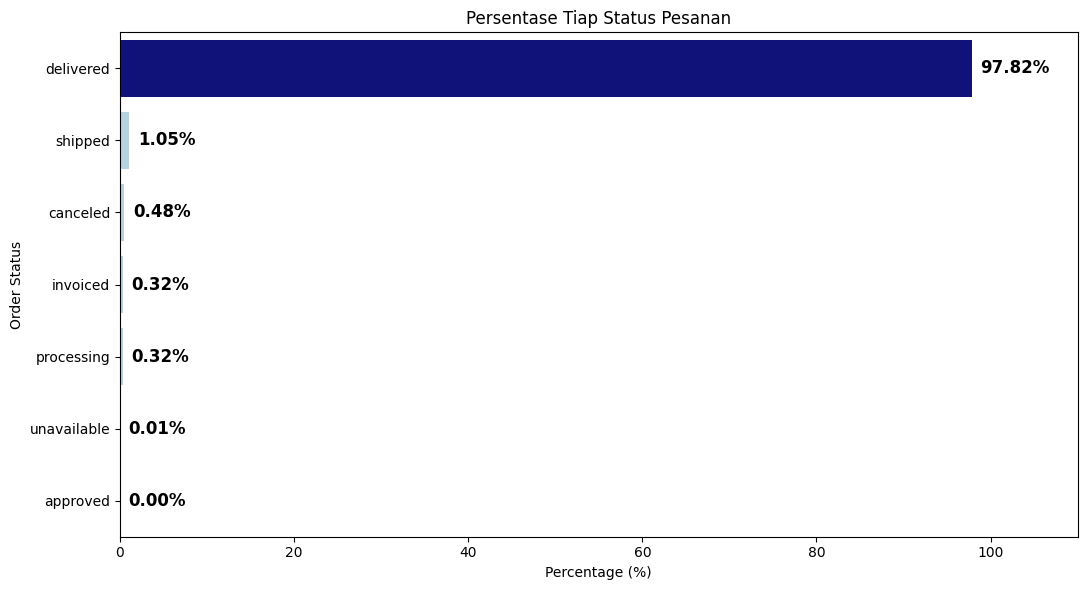

In [ ]:

# 1️⃣ Reset index untuk visualisasi
status_percentage_df_reset = status_percentage_df.reset_index()
status_percentage_df_reset.columns = ["order_status", "percentage"]

# 2️⃣ Konversi kembali ke numerik sebelum visualisasi
status_percentage_df_reset["percentage_numeric"] = status_percentage_df_reset["percentage"].astype(float)

# 3️⃣ Membuat warna biru muda untuk semua bar, dengan yang tertinggi biru tua
colors = ["lightblue"] * len(status_percentage_df_reset)
max_index = status_percentage_df_reset["percentage_numeric"].idxmax()  # Index dengan persentase tertinggi
colors[max_index] = "darkblue"

# 4️⃣ Membuat horizontal bar chart
plt.figure(figsize=(11, 6))
ax = sns.barplot(
    data=status_percentage_df_reset,
    y="order_status",
    x="percentage_numeric",
    palette=colors,
    orient="h"
)

# 5️⃣ Menambahkan label angka di setiap batang
for p in ax.patches:
    ax.annotate(f"{p.get_width():.2f}%",  # Format persentase
                (p.get_width() + 1, p.get_y() + p.get_height() / 2),  # Geser label sedikit ke kanan
                ha="left", va="center", fontsize=12, fontweight="bold")

# 6️⃣ Memperbaiki batas sumbu X agar ada ruang bagi label persentase
plt.xlim(0, 110)

# 7️⃣ Menyesuaikan tampilan agar tidak terpotong
plt.subplots_adjust(left=0.3)

# 8️⃣ Menambahkan judul dan label sumbu
plt.xlabel("Percentage (%)")
plt.ylabel("Order Status")
plt.title("Persentase Tiap Status Pesanan")

# 🔟 Menghindari pemotongan elemen plot
plt.tight_layout()

# Menampilkan plot
plt.show()


### Pertanyaan 5: Wilayah mana yang memiliki jumlah pembatalan pesanan yang paling banyak dan paling sedikit?

In [ ]:
orders_by_state_df = orders_items_customers_products_df[orders_items_customers_products_df["order_status"] == "canceled"].groupby("customer_state")["order_id"].count().reset_index()
orders_by_state_df = orders_by_state_df.rename(columns={"order_id": "canceled"})
orders_by_state_df = orders_by_state_df.sort_values(by="canceled", ascending=False)

orders_by_state_df

,customer_state,canceled
19,SP,293
14,RJ,69
6,MG,56
17,RS,23
13,PR,21
18,SC,15
0,BA,14
4,GO,10
2,DF,9
3,ES,8


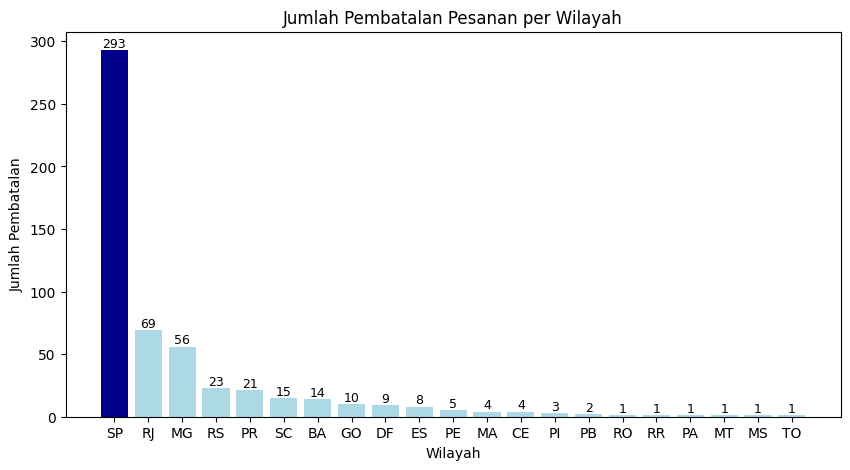

In [ ]:
#Jumlah pembatalan pesanan per wilayah
orders_by_state_df = orders_by_state_df.sort_values(by="canceled", ascending=False)

colors = ["lightblue"] * len(orders_by_state_df)
colors[0] = "darkblue"

plt.figure(figsize=(10, 5))
bars = plt.bar(
    orders_by_state_df["customer_state"],
    orders_by_state_df["canceled"],
    color=colors
    )

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()),
             ha="center", va="bottom", fontsize=9)

plt.xlabel("Wilayah", fontsize=10)
plt.ylabel("Jumlah Pembatalan", fontsize=10)

plt.title("Jumlah Pembatalan Pesanan per Wilayah")
plt.xticks(rotation=0)
plt.show()

**Insight:**

**Pertanyaan 1**
- Health beauty menjadi produk dengan pendapatan tertinggi yaitu 1258681 BRL yang berarti terdapat permintaan tinggi untuk produk perawatan diri dan kecantikan.
- Produk yang menyumbang pendapatan tinggi diikuti oleh kategori produk bed bath table dan watches gift, yang mana mereka berdua memiliki selisih yang sedikit.

**Pertanyaan 2**
- Security and services menjadi produk dengan pendapatan terendah yaitu hanya 283 BRL yang berarti kemungkinan bukan kategori yang sering dibeli online. - Produk dengan pendapatan rendah diikuti oleh kategori fashion children clothes dan cds dvds musicals.

**Pertanyaan 3**
- Jumlah pemesanan tiap bulannya menunjukkan pola yang fluktuatif dan terlihat tren awal meningkat signifikan dari Desember 2016 sampai November 2017.
- Jumlah pemesanan tertinggi terjadi pada bulan November 2017. Kemungkinan karena persiapan Natal dan tahun baru atau diskon akhir tahun.
- Setelah puncak tertinggi terjadi penurunan, tetapi masih menunjukkan tren pesanan yang cenderung tinggi dan stabil di sepanjang 2018.
- Pada musim panas (Juni-Agustus 2018) sedikit menurun kemungkinan karena permintaan yang turun saat musim liburan sekolah.
- Terjadi penurunan ekstrim dari bulan Agustus ke September 2018. Hal itu mungkin karena faktor eksternal seperti perubahan kebijakan bisnis atau faktor ekonomi.

**Pertanyaan 4**
- Status pemesanan delivered mendominasi dibandingkan status yang lain. Hal tersebut artinya 97.82% dari seluruh pesanan berhasil dikirimkan dengan baik.
- Status pemesanan shipped menjadi status tertinggi kedua dengan persentase 1.05%, namun memiliki selisih yang sangat jauh dengan delivered.
- Status pemesanan canceled memiliki persentase yang kecil, yaitu 0.48%.
- Status pemesanan invoiced dan processing memiliki persentase yang sama, yaitu hanya 0.32%.
- Status pemesanan unavailable dan approved memiliki persentase yang sangat mendekati nol karena memang masing-masing status hanya terdapat 7 dan 3 pesanan.

**Pertanyaan 5**
- Wilayah Sao Paulo (SP) memiliki jumlah pembatalan tertinggi yaitu 293 pembatalan dan memiliki jumlah pesanan tertinggi pula.
- RJ dengan 69 pembatalan berada di posisi ke-2 dan MG dengan 56 pembatalan di posisi ke-3 sebagai wilayah yang memiliki jumlah pembatalan tinggi. Kedua wilayah termasuk memiliki banyak pesanan sehingga pembatalan pun dapat mempengaruhi revenue.
- Wilayah yang termasuk ke pembatalan sedang yaitu RS, PR, SC, dan BA namun tetap harus ditingkatkan dan diperhatikan meskipun bukan menjadi priorits utama.
- Wilayah yang memiliki jumlah pembatalan sangat rendah hanya 1  pembatalan yaitu ada wilayah RO, RR, PA, MT, MS, dan TO.

## Analisis Lanjutan (Opsional)

### RFM Analysis

**Tujuan**

Tujuan analisis RFM dengan memperhatikan faktor utama Recency, Frequency, dan Monetary, yaitu sebagai analisis lanjutan pada E-Commerce Public Dataset untuk memahami dan mengelompokkan pelanggan berdasarkan perilaku atau karakteristik dalam berbelanja.

1. Recency
Menghitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian.

2. Frequency
Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu.

3. Monetary
Menghitung total pengeluaran pelanggan dalam periode tersebut.

In [ ]:
#Menghitung total belanja per order_id
orders_summary_df = orders_items_customers_products_df.groupby("order_id").agg(
    total_product_value=("price", "sum"),  # Total harga produk
    total_freight_value=("freight_value", "sum")  # Total ongkos kirim
).reset_index()

# Menambahkan kolom total_order_value (produk + pengiriman)
orders_summary_df["total_order_value"] = orders_summary_df["total_product_value"] + orders_summary_df["total_freight_value"]

In [ ]:
#Menghitung total belanja per pelanggan
customer_spending_df = orders_summary_df.merge(
    orders_items_customers_products_df[["order_id", "customer_unique_id", "order_purchase_timestamp"]],
    on="order_id",
    how="left"
)

customer_spending_df

,order_id,total_product_value,total_freight_value,total_order_value,customer_unique_id,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,72.19,871766c5855e863f6eccc05f988b23cb,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,259.83,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,216.87,3818d81c6709e39d06b2738a8d3a2474,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,25.78,af861d436cfc08b2c2ddefd0ba074622,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,218.04,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04 13:57:51
...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,299.99,43.41,343.40,0c9aeda10a71f369396d0c04dce13a64,2018-04-23 13:57:06
112646,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,386.53,0da9fe112eae0c74d3ba1fe16de0988b,2018-07-14 10:26:46
112647,fffce4705a9662cd70adb13d4a31832d,99.90,16.95,116.85,cd79b407828f02fdbba457111c38e4c4,2017-10-23 17:07:56
112648,fffe18544ffabc95dfada21779c9644f,55.99,8.72,64.71,eb803377c9315b564bdedad672039306,2017-08-14 23:02:59


In [ ]:
# Menentukan tanggal referensi (tanggal terakhir dalam dataset)
reference_date_df = orders_items_customers_products_df["order_purchase_timestamp"].max()

# Menghitung Recency (jumlah hari sejak pembelian terakhir)
rfm_df = customer_spending_df.groupby("customer_unique_id").agg({
    "order_purchase_timestamp": lambda x: (reference_date_df - x.max()).days,
    "order_id": "nunique",
    "total_order_value": "sum"
}).reset_index()

rfm_df.columns = ["customer_unique_id", "Recency", "Frequency", "Monetary"]

# Melihat distribusi pelanggan
rfm_df.describe()

,Recency,Frequency,Monetary
count,95420.000000,95420.000000,95420.000000
mean,242.600377,1.034018,212.791421
std,153.160320,0.211234,641.719462
min,0.000000,1.000000,9.590000
25%,118.000000,1.000000,63.880000
50%,223.000000,1.000000,113.145000
75%,352.000000,1.000000,202.517500
max,728.000000,16.000000,109312.640000


In [ ]:
# Menghitung rata-rata Recency, Frequency, dan Monetary
avg_recency = round(rfm_df["Recency"].mean(), 1)
avg_frequency = round(rfm_df["Frequency"].mean(), 2)
avg_monetary = format_currency(rfm_df["Monetary"].mean(), "BRL", locale='pt_BR')

# Menampilkan rata-rata RFM di console
print(f"Average Recency: {avg_recency} days")
print(f"Average Frequency: {avg_frequency} orders")
print(f"Average Monetary: {avg_monetary}")


Average Recency: 242.6 days
Average Frequency: 1.03 orders
Average Monetary: R$ 212,79


<ipython-input-248-5e174b920f69>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top5_recency["Recency"],
<ipython-input-248-5e174b920f69>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(top5_recency["customer_unique_id"], rotation=45, ha="right")
<ipython-input-248-5e174b920f69>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top5_frequency["Frequency"],
<ipython-input-248-5e174b920f69>:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(top5_frequency["customer_unique_id"

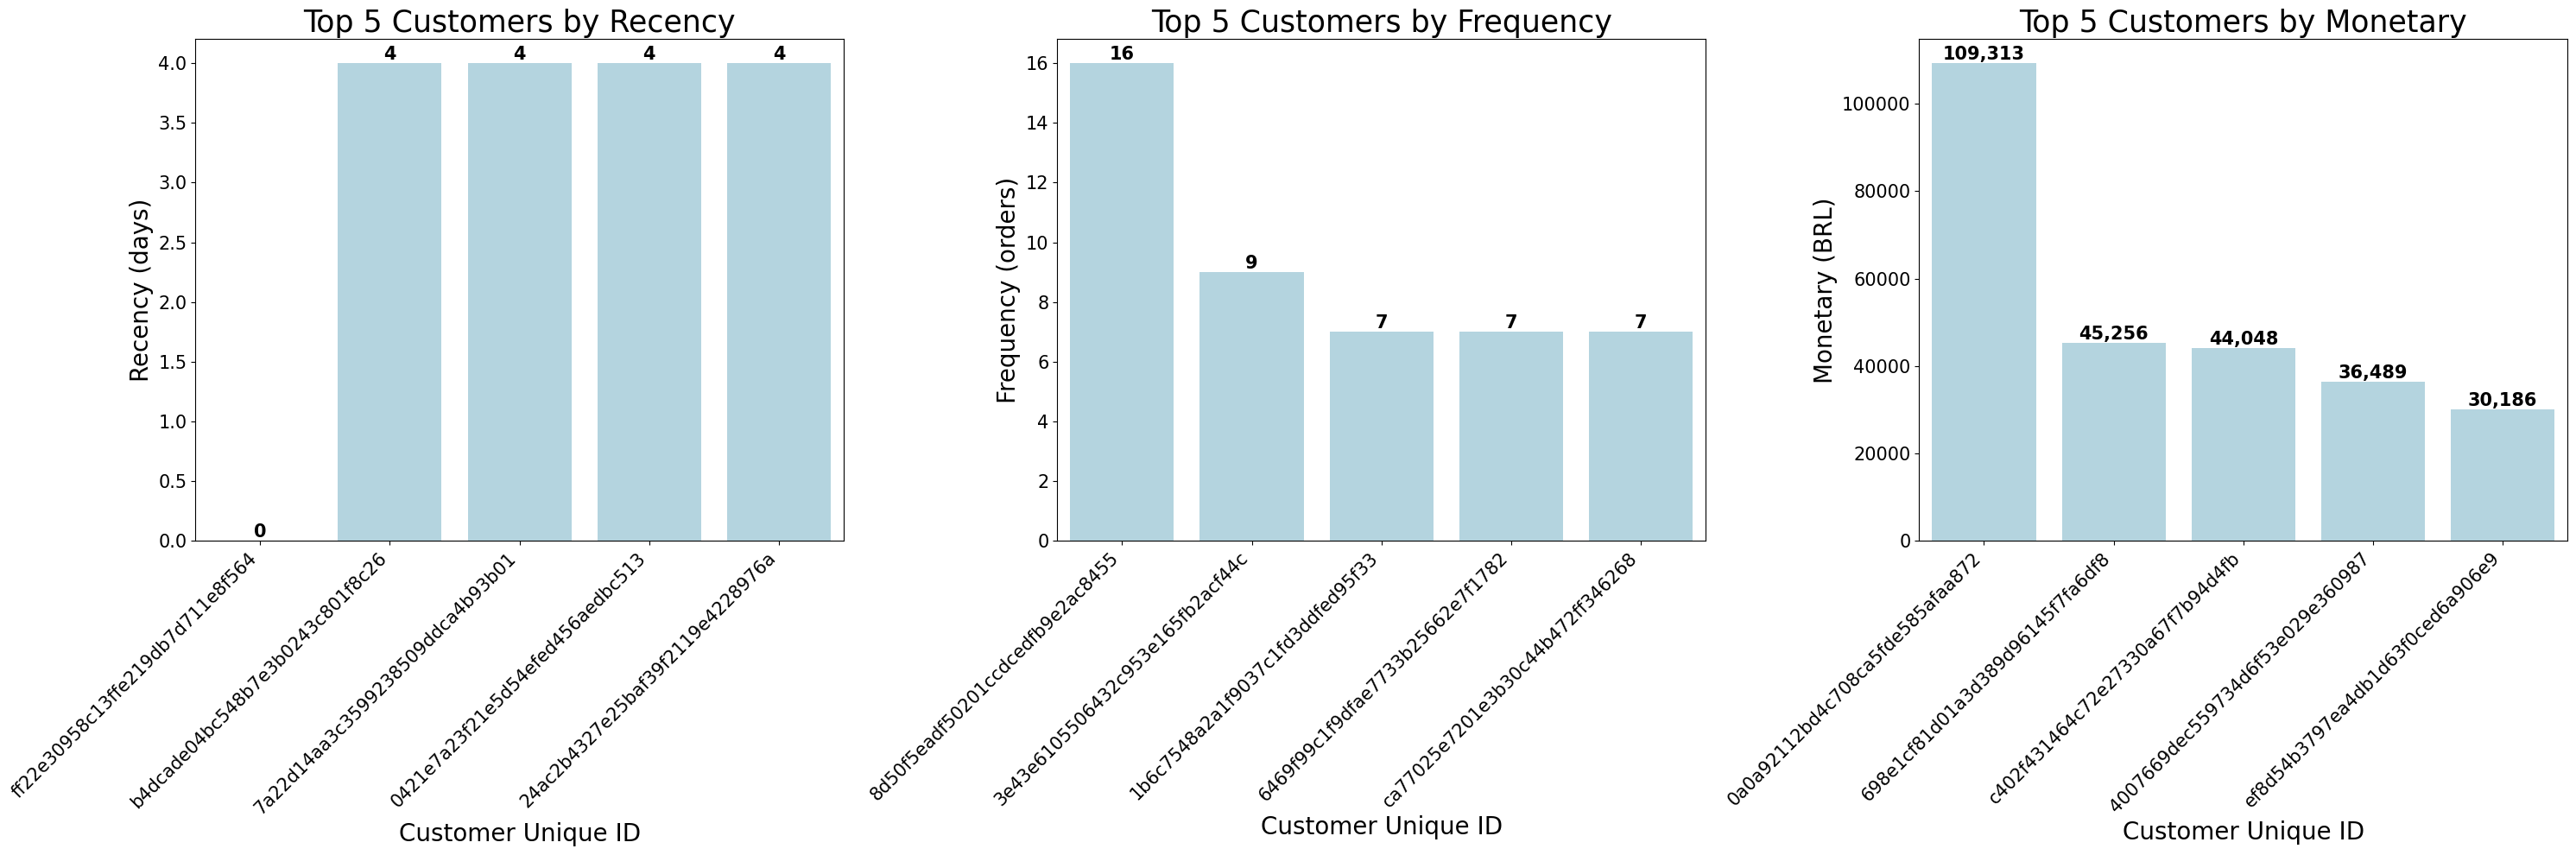

In [ ]:
# Membuat Visualisasi Top 5 Customer berdasarkan RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
colors = ["lightblue"] * 5


# Sorting dan memilih top 5
top5_recency = rfm_df.sort_values(by="Recency", ascending=True).head(5)
top5_frequency = rfm_df.sort_values(by="Frequency", ascending=False).head(5)
top5_monetary = rfm_df.sort_values(by="Monetary", ascending=False).head(5)


# Visualisasi Top 5 Recency (Pelanggan terbaru)
sns.barplot(y=top5_recency["Recency"],
            x=top5_recency["customer_unique_id"],
            palette=colors,
            ax=ax[0])

ax[0].set_ylabel("Recency (days)", fontsize=20)
ax[0].set_xlabel("Customer Unique ID", fontsize=20)
ax[0].set_title("Top 5 Customers by Recency", fontsize=25)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].tick_params(axis='x', labelsize=15, rotation=45)
ax[0].set_xticklabels(top5_recency["customer_unique_id"], rotation=45, ha="right")

for p in ax[0].patches:
    ax[0].annotate(f"{p.get_height():,.0f}",
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='bottom', fontsize=15, fontweight="bold")


# Visualisasi Top 5 Frequency (Pelanggan paling sering belanja)
sns.barplot(y=top5_frequency["Frequency"],
            x=top5_frequency["customer_unique_id"],
            palette=colors,
            ax=ax[1])

ax[1].set_ylabel("Frequency (orders)", fontsize=20)
ax[1].set_xlabel("Customer Unique ID", fontsize=20)
ax[1].set_title("Top 5 Customers by Frequency", fontsize=25)
ax[1].tick_params(axis='y', labelsize=15)
ax[1].tick_params(axis='x', labelsize=15, rotation=45)
ax[1].set_xticklabels(top5_frequency["customer_unique_id"], rotation=45, ha="right")

for p in ax[1].patches:
    ax[1].annotate(f"{p.get_height():,.0f}",
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='bottom', fontsize=15, fontweight="bold")


# Visualisasi Top 5 Monetary (Pelanggan dengan total belanja tertinggi)
sns.barplot(y=top5_monetary["Monetary"],
            x=top5_monetary["customer_unique_id"],
            palette=colors,
            ax=ax[2])

ax[2].set_ylabel("Monetary (BRL)", fontsize=20)
ax[2].set_xlabel("Customer Unique ID", fontsize=20)
ax[2].set_title("Top 5 Customers by Monetary", fontsize=25)
ax[2].tick_params(axis='y', labelsize=15)
ax[2].tick_params(axis='x', labelsize=15, rotation=45)
ax[2].set_xticklabels(top5_monetary["customer_unique_id"], rotation=45, ha="right")

for p in ax[2].patches:
    ax[2].annotate(f"{p.get_height():,.0f}",
                   (p.get_x() + p.get_width() / 2, p.get_height()),
                   ha='center', va='bottom', fontsize=15, fontweight="bold")


# Menampilkan plot
plt.tight_layout()
plt.show()

**Insights**

**Analisis Recency**
- Rata-rata pelanggan terakhir berbelanja sekitar 8 bulan yang lalu.
- Terdapat pelanggan yang baru saja berbelanja dan ada yang tidak berbelanja selama lebih dari 2 tahun.
- Semakin kecil nilai Recency, maka semakin baru transaksi terakhir pelanggan dan terdapat kemungkinan bahwa pelanggan itu akan berbelanja lagi dalam waktu dekat.
- Kemungkinan langkah bisnis yang dapat dilakukan:
  1. Mengadakan promo eksklusif untuk pelanggan yang memiliki nilai Recency kecil agar tetap aktif berbelanja.
  2. Menawarkan diskon dan menggunakan email marketing guna meningkatkan loyalitas pelanggan.


**Analisis Frequency**
- Mayoritas pelanggan hanya membeli 1 sampai 2 kali saja
- Terdapat pelanggan yang membeli sampai 16 kali (high value customers)
- Pelanggan yang tergolong aktif memiliki Frequency antara 9 hingga 7 kali saja.
- Kemungkinan langkah bisnis yang dapat dilakukan:
  1. Menggunakan strategi cross-selling atau upselling guna meningkatkan frekuensi pembelian pelanggan.
  2. Mengidentifikasi pola belanja untuk menyesuaikan rekomendasi produk kepada pelanggan.
  3. Membuat program loyalitas bagi pelanggan dengan frekuensi pembelian tinggi.

**Analisis Monetary**
- Rata-rata pelanggan menghabiskan sekitar 212.791421 BRL per transaksi.
- Terdapat pelanggan yang menghabiskan uang terbanyak hingga 109312.640000 BRL.
- Memiliki variasi pengeluaran yang sangat besar, kemungkinan ada pelanggan dengan transaksi kecil dan ada yang sangat besar.
- Kemungkinan langkah bisnis yang dapat dilakukan:
  1. Menawarkan produk atau layanan premium berdasarkan hasil identifikasi kebutuhan pelanggan berdasarkan monetary tertinggi.
  2. Memberi intensif eksklusif (free shipping, diskon, layanan pelanggan prioritas) guna menjaga loyalitas pelanggan.


## Conclusion

- **Conclusion pertanyaan 1: Kategori produk mana yang menghasilkan pendapatan tertinggi?**

  Kategori produk health beauty menghasilkan pendapatan tertinggi, yaitu sekitar 1258681 BRL yang menunjukkan bahwa terdapat permintaan tinggi untuk produk perawatan diri dan kecantikan sehingga health beauty bisa menjadi kategori produk prioritas serta fokus utama pemasaran.

- **Conclusion pertanyaan 2: Kategori produk mana yang menghasilkan pendapatan terendah?**

  Kategori produk security and services menghasilkan pendapatan terendah, yaitu sekitar 283 BRL yang menunjukkan bahwa kategori ini kurang diminati atau mungkin bukan kategori yang sering dibeli secara online sehingga bisa dilakukan evaluasi apakah akan dihentikan atau diperbaiki strategi pemasarannya dan dipertimbangkan juga apakah terdapat produk lain yang bisa lebih dipromosikan serta menguntungkan.


- **Conclusion pertanyaan 3: Bagaimana pola jumlah pesanan tiap bulan?**

  Jumlah pesanan meningkat pesat sejak Desember 2016 dan mencapai puncaknya pada November 2017, kemudian cukup stabil hingga pertengahan 2018 meskipun pada Juni-Agustus 2018 sedikit menurun yang mungkin disebabkan oleh permintaan yang turun saat libur sekolah musim panas, serta terjadi penurunan drastis pada September 2018 yang perlu diselidiki lebih lanjut untuk mengetahui penyebabnya.

- **Conclusion pertanyaan 4: Status pesanan mana yang paling dominan??**

  Status pesanan yang paling dominan adalah delivered dengan persentase 97.82% yang berarti bahwa hampir seluruh pesanan berhasil dikirim dan diterima oleh pelanggan. Ini juga menunjukkan bahwa sistem pemrosesan dan pengiriman pesanan sudah efektif.

- **Conclusion pertanyaan 5: Wilayah mana yang memiliki jumlah pembatalan pesanan yang paling banyak dan paling sedikit?**

  Wilayah yang memiliki jumlah pembatalan pesanan paling banyak adalah SP (Sao Paulo) dengan 293 pembatalan, yang mana harus menjadi prioritas utama dalam perbaikan logistik dan pengelolaan stok. Sedangkan wilayah dengan jumlah pembatalan pesanan paling sedikit seperti RO, RR, PA, MT, MS, dan TO dengan masing-masing 1 pembatalan, tetap perlu dipantau, namun fokus utama tetap pada wilayah dengan angka pembatalan yang jauh lebih tinggi.


In [ ]:
#Mendownload data utama yang akan digunakan pada pembuatan dashboard
orders_items_customers_products_df.to_csv("all_data.csv", index=False)

orders_items_customers_products_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery,2018-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby,2018-02
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,...,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2,2017-08
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories,2018-01
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories,2018-01
